<a href="https://colab.research.google.com/github/prajktamusale/Basic-codes-java/blob/main/DL_assingment_2_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

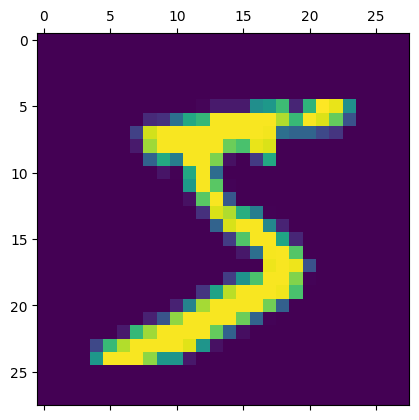

In [5]:
plt.matshow(x_train[0])

In [6]:
x_train = x_train /255
x_test = x_test /255

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
new_var = model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7492 - loss: 1.0253 - val_accuracy: 0.9010 - val_loss: 0.3521
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9029 - loss: 0.3520 - val_accuracy: 0.9187 - val_loss: 0.2888
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9168 - loss: 0.2935 - val_accuracy: 0.9278 - val_loss: 0.2559
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9275 - loss: 0.2561 - val_accuracy: 0.9323 - val_loss: 0.2375
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9352 - loss: 0.2303 - val_accuracy: 0.9390 - val_loss: 0.2145
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9403 - loss: 0.2125 - val_accuracy: 0.9432 - val_loss: 0.2005
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9443 - loss: 0.2021 - val_accuracy: 0.9467 - val_loss: 0.1874
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9480 - loss: 0.1882 - 

In [11]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9457 - loss: 0.1833
Loss=0.158
Accuracy=0.953


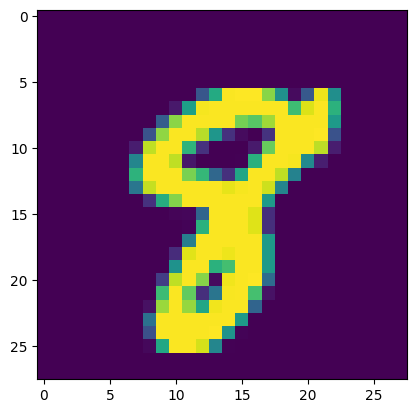

In [12]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [13]:
test_predict = model.predict(x_test)
test_predict_labels = np.argmax(test_predict,axis=1)
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=test_predict_labels)
print('confusion matrix of the test set:\n', confusion_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
confusion matrix of the test set:
 tf.Tensor(
[[ 968    0    0    2    0    4    3    1    1    1]
 [   0 1113    2    2    1    1    4    2   10    0]
 [   7    3  972   12   10    1    5    9   11    2]
 [   0    1    7  967    1    8    1   11   10    4]
 [   1    1    4    0  938    1    6    2    3   26]
 [  10    2    0   16    3  835   11    0    8    7]
 [  11    3    1    0    6   12  919    1    5    0]
 [   1    9   17    6    4    1    0  967    2   21]
 [   5    2    3   18    8    6   11    8  909    4]
 [   7    7    1   12   19    4    1    7    4  947]], shape=(10, 10), dtype=int32)
